# Wordle Reinforcement Experiments

## Imports and Config

In [1]:
import sys
sys.path.append('../..')

In [2]:
import src.config as src_config
from src.models import qlearn, sarsa, dqn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Model & Reward Configs

In [4]:
q_learn_config = {'epsilon': 0.02, 'gamma': 0.05, 'alpha': 0.02}
sarsa_config = {'epsilon': 0.02, 'gamma': 0.05, 'alpha': 0.02}
dqn_config = {'epsilon': 0.8, 'gamma': 0.9, 'alpha': 0.01}
a2c_config = {'epsilon': 0.8, 'gamma': 0.9, 'alpha': 0.01}
trials = 100
iters = 20

In [5]:
src_config.WIN_REWARD = 25
src_config.LOSE_REWARD = -15
src_config.GREEN_REWARD = 5
src_config.YELLOW_REWARD = 3
src_config.GREY_REWARD = -1

## Q - Learn

In [6]:
model = qlearn.QLearn(q_learn_config)

In [7]:
train_solves = []
test_solves = []
for i in range(iters):
    model.train(trials)
    model.update_q(model.Q)
    train_solves.append(len(model.games_solved))
    res = model.test(verbose=False)
    print(f'Games solved: {len(model.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.24it/s]


Games solved: 28/100
Test solved: 0: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.04it/s]


Games solved: 42/100
Test solved: 1: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.34it/s]


Games solved: 48/100
Test solved: 2: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.21it/s]


Games solved: 38/100
Test solved: 3: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.81it/s]


Games solved: 44/100
Test solved: 4: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.90it/s]


Games solved: 41/100
Test solved: 5: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.90it/s]


Games solved: 48/100
Test solved: 6: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.36it/s]


Games solved: 44/100
Test solved: 7: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.11it/s]


Games solved: 44/100
Test solved: 8: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.53it/s]


Games solved: 43/100
Test solved: 9: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.06it/s]


Games solved: 43/100
Test solved: 10: False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.13it/s]


Games solved: 39/100
Test solved: 11: True


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.11it/s]


Games solved: 47/100
Test solved: 12: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.06it/s]


Games solved: 31/100
Test solved: 13: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.87it/s]


Games solved: 39/100
Test solved: 14: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.99it/s]


Games solved: 46/100
Test solved: 15: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.46it/s]


Games solved: 39/100
Test solved: 16: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


Games solved: 39/100
Test solved: 17: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.29it/s]


Games solved: 49/100
Test solved: 18: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:11<00:00,  1.41it/s]


Games solved: 41/100
Test solved: 19: False


Text(0.5, 1.0, 'Test Games solved: 9/20')

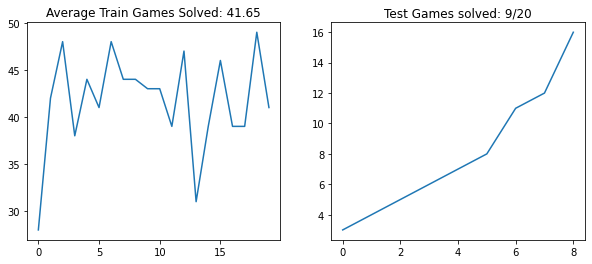

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

In [11]:
strategies = ['HighestLLSmart', 'HighestLL', 'FreshLetters']
q_table = model.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = strategies[q_actions[green, yellow, state]]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 3)


Action                                  \
Game State                     0               1               2   
# Green # Yellow                                                   
0       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        4           FreshLetters  HighestLLSmart  HighestLLSmart   
1       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart   
2       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
3       0         HighestLLSmart    FreshLetters  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
4       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   

                                                                  
Game State                     3               4               5  
# Green # Yellow                                                  
0       0         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        1         HighestLLSmart    FreshLetters  HighestLLSmart  
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        4         HighestLLSmart    FreshLetters  HighestLLSmart  
1       0         HighestLLSmart    FreshLetters  HighestLLSmart  
        1         HighestLLSmart    FreshLetters  HighestLLSmart  
        2         HighestLLSmart    FreshLetters  HighestLLSmart  
        3         HighestLLSmart    FreshLetters  HighestLLSmart  
2       0         HighestLLSmart       HighestLL  HighestLLSmart  
        1         HighestLLSmart       HighestLL  HighestLLSmart  
        2         HighestLLSmart    FreshLetters  HighestLLSmart  
3       0         HighestLLSmart       HighestLL  HighestLLSmart  
        1         HighestLLSmart    FreshLetters  HighestLLSmart  
4       0         HighestLLSmart    FreshLetters  HighestLLSmart

## SARSA

In [12]:
model1 = sarsa.SARSALearn(sarsa_config)

In [13]:
train_solves = []
test_solves = []
for i in range(iters):
    model1.train(trials)
    model1.update_q(model1.Q)
    train_solves.append(len(model1.games_solved))
    res = model1.test(verbose=False)
    print(f'Games solved: {len(model1.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.88it/s]


Games solved: 34/100
Test solved: 0: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


Games solved: 36/100
Test solved: 1: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.61it/s]


Games solved: 38/100
Test solved: 2: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.52it/s]


Games solved: 43/100
Test solved: 3: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.43it/s]


Games solved: 40/100
Test solved: 4: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.79it/s]


Games solved: 51/100
Test solved: 5: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


Games solved: 42/100
Test solved: 6: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.89it/s]


Games solved: 38/100
Test solved: 7: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.29it/s]


Games solved: 34/100
Test solved: 8: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.79it/s]


Games solved: 36/100
Test solved: 9: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.11it/s]


Games solved: 46/100
Test solved: 10: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.89it/s]


Games solved: 44/100
Test solved: 11: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.91it/s]


Games solved: 36/100
Test solved: 12: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.46it/s]


Games solved: 32/100
Test solved: 13: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.81it/s]


Games solved: 42/100
Test solved: 14: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.31it/s]


Games solved: 37/100
Test solved: 15: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.91it/s]


Games solved: 42/100
Test solved: 16: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.95it/s]


Games solved: 46/100
Test solved: 17: True


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.07it/s]


Games solved: 38/100
Test solved: 18: False


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.01it/s]


Games solved: 48/100
Test solved: 19: False


Text(0.5, 1.0, 'Test Games solved: 7/20')

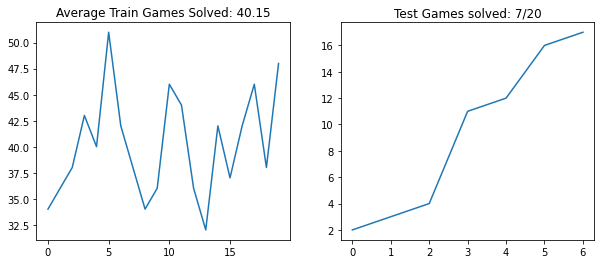

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')

In [16]:
strategies = ['HighestLLSmart', 'HighestLL', 'FreshLetters']
q_table = model1.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src_config.WORD_LENGTH):
    for yellow in range(src_config.WORD_LENGTH-green):
        for state in range(src_config.GAME_LENGTH):
            action = strategies[q_actions[green, yellow, state]]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 3)


Action                                  \
Game State                     0               1               2   
# Green # Yellow                                                   
0       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        4         HighestLLSmart  HighestLLSmart  HighestLLSmart   
1       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart   
2       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        2         HighestLLSmart  HighestLLSmart  HighestLLSmart   
3       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart   
4       0         HighestLLSmart  HighestLLSmart  HighestLLSmart   

                                                                  
Game State                     3               4               5  
# Green # Yellow                                                  
0       0         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        1         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        2         HighestLLSmart       HighestLL  HighestLLSmart  
        3         HighestLLSmart  HighestLLSmart  HighestLLSmart  
        4         HighestLLSmart    FreshLetters  HighestLLSmart  
1       0         HighestLLSmart    FreshLetters  HighestLLSmart  
        1         HighestLLSmart       HighestLL  HighestLLSmart  
        2         HighestLLSmart    FreshLetters  HighestLLSmart  
        3         HighestLLSmart    FreshLetters  HighestLLSmart  
2       0         HighestLLSmart    FreshLetters  HighestLLSmart  
        1         HighestLLSmart    FreshLetters  HighestLLSmart  
        2         HighestLLSmart    FreshLetters  HighestLLSmart  
3       0         HighestLLSmart    FreshLetters  HighestLLSmart  
        1         HighestLLSmart    FreshLetters  HighestLLSmart  
4       0         HighestLLSmart    FreshLetters  HighestLLSmart

## DQN

In [19]:
model2 = dqn.DQNLearn(dqn_config)

In [20]:
train_solves = []
test_solves = []
for i in range(iters):
    model2.train(trials)
    train_solves.append(len(model2.games_solved))
    res = model2.test(verbose=False)
    print(f'Games solved: {len(model2.games_solved)}/{trials}')
    print(f'Test solved: {i}: {res["solved"]}')
    if(res['solved']):
        test_solves.append(i)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 39       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 12       |
|    time_elapsed     | 0        |
|    total_timesteps  | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 15       |
|    time_elapsed     | 0        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 41.7   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.858    |
| time/               |          |
|    episodes         | 23       |
|    fps              | 5        |
|    time_elapsed     | 22       |
|    total_timesteps  | 136      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.852    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 5        |
|    time_elapsed     | 24       |
|    total_timesteps  | 142      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.846    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.731    |
| time/               |          |
|    episodes         | 45       |
|    fps              | 5        |
|    time_elapsed     | 43       |
|    total_timesteps  | 258      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.725    |
| time/               |          |
|    episodes         | 46       |
|    fps              | 5        |
|    time_elapsed     | 44       |
|    total_timesteps  | 264      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.719    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.602    |
| time/               |          |
|    episodes         | 67       |
|    fps              | 5        |
|    time_elapsed     | 72       |
|    total_timesteps  | 382      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 5        |
|    time_elapsed     | 72       |
|    total_timesteps  | 388      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.59     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.65     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 89       |
|    fps              | 5        |
|    time_elapsed     | 87       |
|    total_timesteps  | 503      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.66     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 5        |
|    time_elapsed     | 87       |
|    total_timesteps  | 509      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.66     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 44.2     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 5        |
|    fps              | 3        |
|    time_elapsed     | 7        |
|    total_timesteps  | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 42       |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 6        |
|    fps              | 3        |
|    time_elapsed     | 9        |
|    total_timesteps  | 36       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 40.7     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 27       |
|    fps              | 5        |
|    time_elapsed     | 26       |
|    total_timesteps  | 159      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 43.1     |
|    exploration_rate | 0.831    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 5        |
|    time_elapsed     | 27       |
|    total_timesteps  | 162      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.825    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 42.8     |
|    exploration_rate | 0.701    |
| time/               |          |
|    episodes         | 49       |
|    fps              | 6        |
|    time_elapsed     | 44       |
|    total_timesteps  | 287      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.697    |
| time/               |          |
|    episodes         | 50       |
|    fps              | 6        |
|    time_elapsed     | 46       |
|    total_timesteps  | 291      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 43.1     |
|    exploration_rate | 0.691    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 43.4     |
|    exploration_rate | 0.568    |
| time/               |          |
|    episodes         | 71       |
|    fps              | 6        |
|    time_elapsed     | 61       |
|    total_timesteps  | 415      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 43.5     |
|    exploration_rate | 0.561    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 6        |
|    time_elapsed     | 61       |
|    total_timesteps  | 421      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.556    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 93       |
|    fps              | 7        |
|    time_elapsed     | 68       |
|    total_timesteps  | 546      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 94       |
|    fps              | 8        |
|    time_elapsed     | 68       |
|    total_timesteps  | 552      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 12       |
|    time_elapsed     | 5        |
|    total_timesteps  | 71       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes         | 13       |
|    fps              | 12       |
|    time_elapsed     | 5        |
|    total_timesteps  | 77       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.914    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.795    |
| time/               |          |
|    episodes         | 34       |
|    fps              | 11       |
|    time_elapsed     | 16       |
|    total_timesteps  | 197      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 35       |
|    fps              | 10       |
|    time_elapsed     | 18       |
|    total_timesteps  | 203      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 45.4     |
|    exploration_rate | 0.782    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 7        |
|    time_elapsed     | 44       |
|    total_timesteps  | 326      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes         | 57       |
|    fps              | 7        |
|    time_elapsed     | 45       |
|    total_timesteps  | 332      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.526    |
| time/               |          |
|    episodes         | 78       |
|    fps              | 6        |
|    time_elapsed     | 75       |
|    total_timesteps  | 455      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.52     |
| time/               |          |
|    episodes         | 79       |
|    fps              | 6        |
|    time_elapsed     | 76       |
|    total_timesteps  | 461      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.514    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 5        |
|    time_elapsed     | 104      |
|    total_timesteps  | 584      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 101      |
|    fps              | 5        |
|    time_elapsed     | 105      |
|    total_timesteps  | 590      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.889    |
| time/               |          |
|    episodes         | 18       |
|    fps              | 4        |
|    time_elapsed     | 26       |
|    total_timesteps  | 107      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.882    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 4        |
|    time_elapsed     | 27       |
|    total_timesteps  | 113      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.876    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.97     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 4        |
|    time_elapsed     | 52       |
|    total_timesteps  | 239      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.98     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes         | 41       |
|    fps              | 4        |
|    time_elapsed     | 55       |
|    total_timesteps  | 245      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.74     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.617    |
| time/               |          |
|    episodes         | 62       |
|    fps              | 4        |
|    time_elapsed     | 84       |
|    total_timesteps  | 368      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.61     |
| time/               |          |
|    episodes         | 63       |
|    fps              | 4        |
|    time_elapsed     | 84       |
|    total_timesteps  | 374      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.94     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.604    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 84       |
|    fps              | 4        |
|    time_elapsed     | 109      |
|    total_timesteps  | 494      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 4        |
|    time_elapsed     | 110      |
|    total_timesteps  | 500      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6        |
|    time_elapsed     | 3        |
|    total_timesteps  | 24       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 5        |
|    fps              | 5        |
|    time_elapsed     | 4        |
|    total_timesteps  | 29       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 54.5     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.841    |
| time/               |          |
|    episodes         | 26       |
|    fps              | 5        |
|    time_elapsed     | 27       |
|    total_timesteps  | 153      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 27       |
|    fps              | 5        |
|    time_elapsed     | 30       |
|    total_timesteps  | 159      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.828    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 43.3     |
|    exploration_rate | 0.704    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 5        |
|    time_elapsed     | 49       |
|    total_timesteps  | 284      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.698    |
| time/               |          |
|    episodes         | 49       |
|    fps              | 5        |
|    time_elapsed     | 50       |
|    total_timesteps  | 290      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 44.4     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.568    |
| time/               |          |
|    episodes         | 70       |
|    fps              | 6        |
|    time_elapsed     | 62       |
|    total_timesteps  | 415      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.561    |
| time/               |          |
|    episodes         | 71       |
|    fps              | 6        |
|    time_elapsed     | 63       |
|    total_timesteps  | 421      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 44.2     |
|    exploration_rate | 0.555    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 92       |
|    fps              | 7        |
|    time_elapsed     | 71       |
|    total_timesteps  | 541      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 93       |
|    fps              | 7        |
|    time_elapsed     | 72       |
|    total_timesteps  | 545      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 13       |
|    time_elapsed     | 4        |
|    total_timesteps  | 60       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 11       |
|    fps              | 13       |
|    time_elapsed     | 4        |
|    total_timesteps  | 66       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.803    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 5        |
|    time_elapsed     | 32       |
|    total_timesteps  | 189      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes         | 33       |
|    fps              | 5        |
|    time_elapsed     | 33       |
|    total_timesteps  | 195      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.91     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.791    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 54       |
|    fps              | 5        |
|    time_elapsed     | 61       |
|    total_timesteps  | 320      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 55       |
|    fps              | 5        |
|    time_elapsed     | 63       |
|    total_timesteps  | 326      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.529    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 4        |
|    time_elapsed     | 93       |
|    total_timesteps  | 452      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.523    |
| time/               |          |
|    episodes         | 77       |
|    fps              | 4        |
|    time_elapsed     | 94       |
|    total_timesteps  | 458      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.95     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.517    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 98       |
|    fps              | 4        |
|    time_elapsed     | 116      |
|    total_timesteps  | 581      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 99       |
|    fps              | 4        |
|    time_elapsed     | 119      |
|    total_timesteps  | 587      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 45.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 42.6     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 18       |
|    fps              | 6        |
|    time_elapsed     | 16       |
|    total_timesteps  | 103      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 42.2     |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 5        |
|    time_elapsed     | 18       |
|    total_timesteps  | 109      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.88     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.76     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 5        |
|    time_elapsed     | 44       |
|    total_timesteps  | 230      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.754    |
| time/               |          |
|    episodes         | 41       |
|    fps              | 5        |
|    time_elapsed     | 46       |
|    total_timesteps  | 236      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.748    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 62       |
|    fps              | 4        |
|    time_elapsed     | 75       |
|    total_timesteps  | 361      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 63       |
|    fps              | 4        |
|    time_elapsed     | 75       |
|    total_timesteps  | 367      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 84       |
|    fps              | 4        |
|    time_elapsed     | 100      |
|    total_timesteps  | 491      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 4        |
|    time_elapsed     | 101      |
|    total_timesteps  | 497      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 67       |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 14       |
|    time_elapsed     | 0        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 59.7     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 3        |
|    fps              | 10       |
|    time_elapsed     | 1        |
|    total_timesteps  | 18       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 53.5     |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 49.9     |
|    exploration_rate | 0.853    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 11       |
|    time_elapsed     | 11       |
|    total_timesteps  | 141      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 50.5     |
|    exploration_rate | 0.848    |
| time/               |          |
|    episodes         | 25       |
|    fps              | 12       |
|    time_elapsed     | 11       |
|    total_timesteps  | 146      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 49.7     |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.72     |
| time/               |          |
|    episodes         | 46       |
|    fps              | 11       |
|    time_elapsed     | 22       |
|    total_timesteps  | 269      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes         | 47       |
|    fps              | 11       |
|    time_elapsed     | 23       |
|    total_timesteps  | 275      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.707    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.583    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 8        |
|    time_elapsed     | 44       |
|    total_timesteps  | 400      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.577    |
| time/               |          |
|    episodes         | 69       |
|    fps              | 8        |
|    time_elapsed     | 45       |
|    total_timesteps  | 406      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.571    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 6        |
|    time_elapsed     | 75       |
|    total_timesteps  | 526      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 91       |
|    fps              | 6        |
|    time_elapsed     | 78       |
|    total_timesteps  | 532      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.44     |
|    ep_rew_mean      | 51.8     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 9        |
|    fps              | 6        |
|    time_elapsed     | 7        |
|    total_timesteps  | 49       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | 50.1     |
|    exploration_rate | 0.943    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 6        |
|    time_elapsed     | 8        |
|    total_timesteps  | 55       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.55     |
|    ep_rew_mean      | 48.9     |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.65     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.818    |
| time/               |          |
|    episodes         | 31       |
|    fps              | 6        |
|    time_elapsed     | 28       |
|    total_timesteps  | 175      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.66     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.811    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 5        |
|    time_elapsed     | 30       |
|    total_timesteps  | 181      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.682    |
| time/               |          |
|    episodes         | 53       |
|    fps              | 4        |
|    time_elapsed     | 67       |
|    total_timesteps  | 305      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.676    |
| time/               |          |
|    episodes         | 54       |
|    fps              | 4        |
|    time_elapsed     | 69       |
|    total_timesteps  | 311      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.67     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 75       |
|    fps              | 4        |
|    time_elapsed     | 102      |
|    total_timesteps  | 434      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.542    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 4        |
|    time_elapsed     | 105      |
|    total_timesteps  | 440      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.535    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 97       |
|    fps              | 4        |
|    time_elapsed     | 127      |
|    total_timesteps  | 561      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 98       |
|    fps              | 4        |
|    time_elapsed     | 128      |
|    total_timesteps  | 567      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 47.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 15       |
|    fps              | 4        |
|    time_elapsed     | 17       |
|    total_timesteps  | 87       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 47.6     |
|    exploration_rate | 0.905    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 5        |
|    time_elapsed     | 18       |
|    total_timesteps  | 91       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.71     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.899    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 50.4     |
|    exploration_rate | 0.775    |
| time/               |          |
|    episodes         | 37       |
|    fps              | 5        |
|    time_elapsed     | 40       |
|    total_timesteps  | 216      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 49.9     |
|    exploration_rate | 0.769    |
| time/               |          |
|    episodes         | 38       |
|    fps              | 5        |
|    time_elapsed     | 43       |
|    total_timesteps  | 222      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.762    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.644    |
| time/               |          |
|    episodes         | 59       |
|    fps              | 4        |
|    time_elapsed     | 69       |
|    total_timesteps  | 342      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.638    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 5        |
|    time_elapsed     | 69       |
|    total_timesteps  | 348      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.632    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.507    |
| time/               |          |
|    episodes         | 81       |
|    fps              | 4        |
|    time_elapsed     | 95       |
|    total_timesteps  | 473      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.501    |
| time/               |          |
|    episodes         | 82       |
|    fps              | 4        |
|    time_elapsed     | 97       |
|    total_timesteps  | 479      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 103      |
|    fps              | 4        |
|    time_elapsed     | 136      |
|    total_timesteps  | 598      |
----------------------------------
Games solved: 26/100
Test solved: 9: False
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 10       |
|    time_elapsed     | 0        |
|    total_timesteps  | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      |

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 21       |
|    fps              | 5        |
|    time_elapsed     | 23       |
|    total_timesteps  | 122      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.867    |
| time/               |          |
|    episodes         | 22       |
|    fps              | 5        |
|    time_elapsed     | 23       |
|    total_timesteps  | 128      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.86     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.74     |
| time/               |          |
|    episodes         | 43       |
|    fps              | 5        |
|    time_elapsed     | 47       |
|    total_timesteps  | 250      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 5        |
|    time_elapsed     | 50       |
|    total_timesteps  | 256      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.727    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.9     |
|    exploration_rate | 0.603    |
| time/               |          |
|    episodes         | 65       |
|    fps              | 4        |
|    time_elapsed     | 85       |
|    total_timesteps  | 381      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.597    |
| time/               |          |
|    episodes         | 66       |
|    fps              | 4        |
|    time_elapsed     | 87       |
|    total_timesteps  | 387      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 87       |
|    fps              | 4        |
|    time_elapsed     | 110      |
|    total_timesteps  | 508      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 88       |
|    fps              | 4        |
|    time_elapsed     | 111      |
|    total_timesteps  | 514      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 51       |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 6        |
|    fps              | 4        |
|    time_elapsed     | 8        |
|    total_timesteps  | 36       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 7        |
|    fps              | 4        |
|    time_elapsed     | 8        |
|    total_timesteps  | 42       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 48.8     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 6        |
|    time_elapsed     | 27       |
|    total_timesteps  | 166      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes         | 29       |
|    fps              | 6        |
|    time_elapsed     | 28       |
|    total_timesteps  | 172      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.815    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.7      |
| time/               |          |
|    episodes         | 50       |
|    fps              | 5        |
|    time_elapsed     | 51       |
|    total_timesteps  | 288      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.694    |
| time/               |          |
|    episodes         | 51       |
|    fps              | 5        |
|    time_elapsed     | 54       |
|    total_timesteps  | 294      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.69     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 5        |
|    time_elapsed     | 78       |
|    total_timesteps  | 413      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 47.8     |
|    exploration_rate | 0.564    |
| time/               |          |
|    episodes         | 73       |
|    fps              | 5        |
|    time_elapsed     | 79       |
|    total_timesteps  | 419      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.1     |
|    exploration_rate | 0.557    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 94       |
|    fps              | 5        |
|    time_elapsed     | 101      |
|    total_timesteps  | 540      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 95       |
|    fps              | 5        |
|    time_elapsed     | 101      |
|    total_timesteps  | 546      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 11       |
|    fps              | 5        |
|    time_elapsed     | 12       |
|    total_timesteps  | 66       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 38.7     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 5        |
|    time_elapsed     | 13       |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 40.1     |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 44.2     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes         | 33       |
|    fps              | 5        |
|    time_elapsed     | 35       |
|    total_timesteps  | 194      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 34       |
|    fps              | 5        |
|    time_elapsed     | 36       |
|    total_timesteps  | 200      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 55       |
|    fps              | 4        |
|    time_elapsed     | 65       |
|    total_timesteps  | 320      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 4        |
|    time_elapsed     | 65       |
|    total_timesteps  | 326      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.82     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 46       |
|    exploration_rate | 0.531    |
| time/               |          |
|    episodes         | 77       |
|    fps              | 4        |
|    time_elapsed     | 91       |
|    total_timesteps  | 450      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.525    |
| time/               |          |
|    episodes         | 78       |
|    fps              | 4        |
|    time_elapsed     | 92       |
|    total_timesteps  | 456      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.84     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.52     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 99       |
|    fps              | 4        |
|    time_elapsed     | 117      |
|    total_timesteps  | 577      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 4        |
|    time_elapsed     | 117      |
|    total_timesteps  | 583      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 18       |
|    fps              | 4        |
|    time_elapsed     | 25       |
|    total_timesteps  | 104      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 53.3     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 19       |
|    fps              | 3        |
|    time_elapsed     | 27       |
|    total_timesteps  | 110      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 53       |
|    exploration_rate | 0.879    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.4     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 4        |
|    time_elapsed     | 55       |
|    total_timesteps  | 233      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.751    |
| time/               |          |
|    episodes         | 41       |
|    fps              | 4        |
|    time_elapsed     | 55       |
|    total_timesteps  | 239      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.83     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.745    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.628    |
| time/               |          |
|    episodes         | 62       |
|    fps              | 4        |
|    time_elapsed     | 85       |
|    total_timesteps  | 357      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.622    |
| time/               |          |
|    episodes         | 63       |
|    fps              | 4        |
|    time_elapsed     | 86       |
|    total_timesteps  | 363      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 49.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 84       |
|    fps              | 4        |
|    time_elapsed     | 107      |
|    total_timesteps  | 483      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 49.1     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 85       |
|    fps              | 4        |
|    time_elapsed     | 107      |
|    total_timesteps  | 489      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 3        |
|    time_elapsed     | 3        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 3        |
|    fps              | 4        |
|    time_elapsed     | 4        |
|    total_timesteps  | 18       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 57       |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 50.5     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 3        |
|    time_elapsed     | 38       |
|    total_timesteps  | 138      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 50       |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes         | 25       |
|    fps              | 3        |
|    time_elapsed     | 39       |
|    total_timesteps  | 144      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 51.4     |
|    exploration_rate | 0.726    |
| time/               |          |
|    episodes         | 46       |
|    fps              | 3        |
|    time_elapsed     | 66       |
|    total_timesteps  | 263      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 51.2     |
|    exploration_rate | 0.72     |
| time/               |          |
|    episodes         | 47       |
|    fps              | 3        |
|    time_elapsed     | 68       |
|    total_timesteps  | 269      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 4        |
|    time_elapsed     | 97       |
|    total_timesteps  | 392      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 69       |
|    fps              | 4        |
|    time_elapsed     | 98       |
|    total_timesteps  | 398      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.77     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 4        |
|    time_elapsed     | 127      |
|    total_timesteps  | 521      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 91       |
|    fps              | 4        |
|    time_elapsed     | 129      |
|    total_timesteps  | 527      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 49.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 10       |
|    total_timesteps  | 46       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.67     |
|    ep_rew_mean      | 51.1     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 9        |
|    fps              | 4        |
|    time_elapsed     | 11       |
|    total_timesteps  | 51       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.7      |
|    ep_rew_mean      | 49.3     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.819    |
| time/               |          |
|    episodes         | 30       |
|    fps              | 5        |
|    time_elapsed     | 33       |
|    total_timesteps  | 174      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.812    |
| time/               |          |
|    episodes         | 31       |
|    fps              | 4        |
|    time_elapsed     | 36       |
|    total_timesteps  | 180      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 51.5     |
|    exploration_rate | 0.806    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 5        |
|    time_elapsed     | 60       |
|    total_timesteps  | 304      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47.5     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes         | 53       |
|    fps              | 5        |
|    time_elapsed     | 61       |
|    total_timesteps  | 310      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.671    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.549    |
| time/               |          |
|    episodes         | 74       |
|    fps              | 5        |
|    time_elapsed     | 85       |
|    total_timesteps  | 433      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 75       |
|    fps              | 5        |
|    time_elapsed     | 85       |
|    total_timesteps  | 439      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.536    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 96       |
|    fps              | 5        |
|    time_elapsed     | 108      |
|    total_timesteps  | 564      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 97       |
|    fps              | 5        |
|    time_elapsed     | 109      |
|    total_timesteps  | 570      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.908    |
| time/               |          |
|    episodes         | 15       |
|    fps              | 4        |
|    time_elapsed     | 21       |
|    total_timesteps  | 88       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.902    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 4        |
|    time_elapsed     | 22       |
|    total_timesteps  | 94       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.896    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.774    |
| time/               |          |
|    episodes         | 37       |
|    fps              | 5        |
|    time_elapsed     | 39       |
|    total_timesteps  | 217      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.768    |
| time/               |          |
|    episodes         | 38       |
|    fps              | 5        |
|    time_elapsed     | 40       |
|    total_timesteps  | 223      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.87     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.761    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 43.9     |
|    exploration_rate | 0.636    |
| time/               |          |
|    episodes         | 59       |
|    fps              | 5        |
|    time_elapsed     | 64       |
|    total_timesteps  | 349      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.63     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 5        |
|    time_elapsed     | 66       |
|    total_timesteps  | 355      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.92     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.503    |
| time/               |          |
|    episodes         | 81       |
|    fps              | 5        |
|    time_elapsed     | 93       |
|    total_timesteps  | 477      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 44.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 82       |
|    fps              | 5        |
|    time_elapsed     | 94       |
|    total_timesteps  | 483      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.89     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 55       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 3        |
|    time_elapsed     | 1        |
|    total_timesteps  | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 3        |
|    time_elapsed     | 3        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.981    |
| time/             

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 54.7     |
|    exploration_rate | 0.863    |
| time/               |          |
|    episodes         | 23       |
|    fps              | 4        |
|    time_elapsed     | 32       |
|    total_timesteps  | 132      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 54.1     |
|    exploration_rate | 0.856    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 4        |
|    time_elapsed     | 32       |
|    total_timesteps  | 138      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 55.2     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 53.2     |
|    exploration_rate | 0.728    |
| time/               |          |
|    episodes         | 45       |
|    fps              | 4        |
|    time_elapsed     | 55       |
|    total_timesteps  | 261      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes         | 46       |
|    fps              | 4        |
|    time_elapsed     | 55       |
|    total_timesteps  | 267      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.81     |
|    ep_rew_mean      | 52.5     |
|    exploration_rate | 0.716    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 52.7     |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes         | 67       |
|    fps              | 5        |
|    time_elapsed     | 77       |
|    total_timesteps  | 388      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 52.9     |
|    exploration_rate | 0.591    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 4        |
|    time_elapsed     | 79       |
|    total_timesteps  | 393      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.78     |
|    ep_rew_mean      | 52.7     |
|    exploration_rate | 0.584    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.75     |
|    ep_rew_mean      | 52.6     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 89       |
|    fps              | 4        |
|    time_elapsed     | 104      |
|    total_timesteps  | 512      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 52.5     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 90       |
|    fps              | 4        |
|    time_elapsed     | 106      |
|    total_timesteps  | 518      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 52.2     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | 57.8     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 6        |
|    fps              | 3        |
|    time_elapsed     | 8        |
|    total_timesteps  | 33       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.57     |
|    ep_rew_mean      | 56       |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes         | 7        |
|    fps              | 4        |
|    time_elapsed     | 9        |
|    total_timesteps  | 39       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.62     |
|    ep_rew_mean      | 55.6     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.79     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.831    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 5        |
|    time_elapsed     | 29       |
|    total_timesteps  | 162      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.72     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.827    |
| time/               |          |
|    episodes         | 29       |
|    fps              | 5        |
|    time_elapsed     | 29       |
|    total_timesteps  | 166      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.73     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.821    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.701    |
| time/               |          |
|    episodes         | 50       |
|    fps              | 5        |
|    time_elapsed     | 56       |
|    total_timesteps  | 287      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.698    |
| time/               |          |
|    episodes         | 51       |
|    fps              | 5        |
|    time_elapsed     | 57       |
|    total_timesteps  | 290      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.69     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.692    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.76     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.568    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 4        |
|    time_elapsed     | 89       |
|    total_timesteps  | 415      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.564    |
| time/               |          |
|    episodes         | 73       |
|    fps              | 4        |
|    time_elapsed     | 91       |
|    total_timesteps  | 419      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.74     |
|    ep_rew_mean      | 46.3     |
|    exploration_rate | 0.557    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 94       |
|    fps              | 4        |
|    time_elapsed     | 117      |
|    total_timesteps  | 545      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 95       |
|    fps              | 4        |
|    time_elapsed     | 121      |
|    total_timesteps  | 551      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.8      |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 3        |
|    time_elapsed     | 19       |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes         | 13       |
|    fps              | 3        |
|    time_elapsed     | 22       |
|    total_timesteps  | 78       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6        |
|    ep_rew_mean      | 41.7     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.97     |
|    ep_rew_mean      | 44.3     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 34       |
|    fps              | 3        |
|    time_elapsed     | 50       |
|    total_timesteps  | 203      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.97     |
|    ep_rew_mean      | 44.3     |
|    exploration_rate | 0.782    |
| time/               |          |
|    episodes         | 35       |
|    fps              | 3        |
|    time_elapsed     | 54       |
|    total_timesteps  | 209      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.97     |
|    ep_rew_mean      | 44.5     |
|    exploration_rate | 0.776    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.654    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 3        |
|    time_elapsed     | 87       |
|    total_timesteps  | 332      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes         | 57       |
|    fps              | 3        |
|    time_elapsed     | 88       |
|    total_timesteps  | 338      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.93     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.642    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.524    |
| time/               |          |
|    episodes         | 78       |
|    fps              | 3        |
|    time_elapsed     | 117      |
|    total_timesteps  | 457      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.86     |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.518    |
| time/               |          |
|    episodes         | 79       |
|    fps              | 3        |
|    time_elapsed     | 119      |
|    total_timesteps  | 463      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.85     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.512    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 100      |
|    fps              | 4        |
|    time_elapsed     | 138      |
|    total_timesteps  | 588      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 101      |
|    fps              | 4        |
|    time_elapsed     | 140      |
|    total_timesteps  | 594      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.88     |
|    ep_rew_mean      | 48.4     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes       

Text(0.5, 1.0, 'Test Games solved: 2/20')

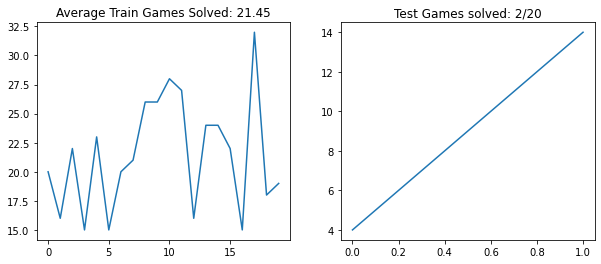

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(list(range(len(train_solves))), train_solves)
axs[0].set_title(f'Average Train Games Solved: {sum(train_solves)/iters}')
axs[1].plot(list(range(len(test_solves))), test_solves)
axs[1].set_title(f'Test Games solved: {len(test_solves)}/{iters}')